## Exploratory analysis showing trends over the year's

In [35]:
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib as plt
from pylab import *
from matplotlib import *
import time
import os
import plotly.plotly as py
import numpy as np

In [2]:
import logging
import logging.handlers

logger=logging.getLogger(__name__)
logger.setLevel(logging.INFO)

logfile1 = time.strftime("%Y-%m-%d_%H_%M_%S"+".log")
print (logfile1)
handler= logging.FileHandler(logfile1)
handler.setLevel(logging.INFO)

formatter= logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)

2017-07-21_19_20_40.log


In [16]:
path=os.getcwd()+'/Summaries/'

In [4]:
logger.info('Creating DataFrame for trends over year')
df=pd.read_csv(path+'Orig_Loan_Details_Over_Year_State.csv')

df_year= (df.groupby('year')['NUMBER OF UNITS','ORIGINAL UPB','CREDIT SCORE', '(CLTV)','(LTV)','DTI) RATIO','MORTGAGE INSURANCE PERCENTAGE (MI %)',
                           'ORIGINAL INTEREST RATE'].mean()).reset_index()

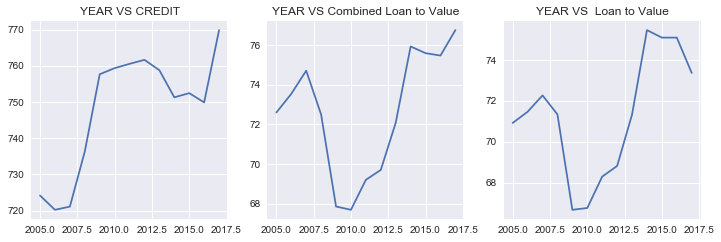

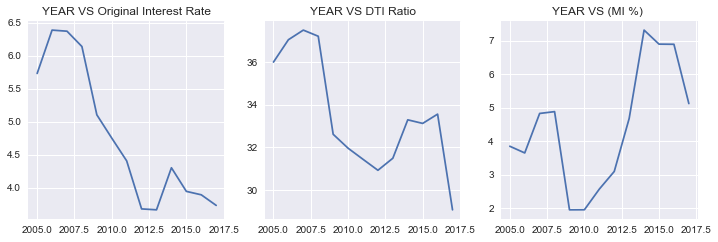

In [5]:
logger.info('Plotting trends over year')

plt.figure()

plt.figure(figsize=(12,8))
plt.subplot(231)
plt.title("YEAR VS CREDIT")
plt.plot(df_year['year'], df_year['CREDIT SCORE'])
plt.xlabel=("Year")
plt.set_ylabel=("Credit Score")

plt.subplot(232)
plt.title("YEAR VS Combined Loan to Value")
plt.xlabel=("Year")
plt.ylabel=("Combined Loan to Value")
plt.plot(df_year['year'],  df_year['(CLTV)'])

plt.subplot(233)
plt.title("YEAR VS  Loan to Value")
plt.xlabel=("Year")
plt.ylabel=(" Loan to Value")
plt.plot(df_year['year'],  df_year['(LTV)'])


plt.figure(figsize=(12,8))

plt.subplot(234)
plt.title("YEAR VS Original Interest Rate")
plt.xlabel=("Year")
plt.ylabel=("Original Interest Rate")
plt.plot(df_year['year'],  df_year['ORIGINAL INTEREST RATE'])

plt.subplot(235)
plt.title("YEAR VS DTI Ratio")
plt.xlabel=("Year")
plt.ylabel=("DTI Raatio")
plt.plot(df_year['year'],  df_year['DTI) RATIO'])

plt.subplot(236)
plt.title("YEAR VS (MI %) ")
plt.xlabel=("Year")
plt.ylabel=("DTI Raatio")
plt.plot(df_year['year'],  df_year['MORTGAGE INSURANCE PERCENTAGE (MI %)'])

plt.show()

## We can see that Loan to Value, COmbined Loan to Value and MI% are very much related to each other. 

## We can also the decline in almost all the graphs starting from the year 2007 i.e. when the recession period started. As economy was improving we can see increase in almost all the plots tarting from year 2011. 

## One more analysis that we can see is almost every plot reaching its peak in 2014 post recession. We will look more into it in further analysis

In [6]:
df_state= (df.groupby('PROPERTY STATE')['NUMBER OF UNITS','ORIGINAL UPB','CREDIT SCORE', '(CLTV)','(LTV)','DTI) RATIO','MORTGAGE INSURANCE PERCENTAGE (MI %)',
                           'ORIGINAL INTEREST RATE'].mean()).reset_index()

In [7]:
df_state.head()

,PROPERTY STATE,NUMBER OF UNITS,ORIGINAL UPB,CREDIT SCORE,(CLTV),(LTV),DTI) RATIO,MORTGAGE INSURANCE PERCENTAGE (MI %),ORIGINAL INTEREST RATE
0,AK,125.000000,223723.606450,744.025921,73.576199,72.805341,34.044503,5.755242,4.800547
1,AL,515.750000,171267.462520,743.769291,75.925885,74.824431,32.470492,6.082196,4.847151
2,AR,331.583333,150654.661317,744.630930,74.938860,74.189639,32.178733,5.929075,4.838315
3,AZ,1164.250000,192111.638154,749.842606,70.975060,70.091019,34.141265,3.514224,4.977262
4,CA,5994.416667,293039.106573,751.244358,62.590290,61.442552,36.239942,1.603094,4.893985


In [9]:
data =[ dict(type='choropleth',
locations = df_state['PROPERTY STATE'],
locationmode ='USA-states' , z = df_state['NUMBER OF UNITS'],
text = df_state['PROPERTY STATE'], colorbar = {'title':'Number of Units'},
# colorscale = 'Viridis',
colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],              reversescale = True)]

layout = dict(title='Number of Units over the STATES',
geo = dict(showframe=False,scope='usa',
            projection=dict( type='albers usa' )))

figure = dict(data = data,layout = layout)
py.iplot(figure)

## The top 5 states having most number of loans are CALIFORNIA, TEXAS, FLORiDA, ILLINOIS and NEW YORK. 

In [10]:
data =[ dict(type='choropleth',
locations = df_state['PROPERTY STATE'],
locationmode ='USA-states' , z = df_state['ORIGINAL UPB'],
text = df_state['PROPERTY STATE'], colorbar = {'title':'ORIGINAL UPB'},
colorscale = 'Viridis',             reversescale = True)]

layout = dict(title='Original UPB over the States',
geo = dict(showframe=False,scope='usa',
            projection=dict( type='albers usa' )))

figure = dict(data = data,layout = layout)
py.iplot(figure)

## CALIFORNIA still leads the race when it comes for original UPB. Comparing from the above graph i.e number of loans given, FLORIDA and TEXAS has less number of Original UPB. 

## While, states like Virginia, Colorado, Washington and Maryland have significantly more UPB

In [66]:
path=os.getcwd()+'/Summaries/'
df_del_state1= pd.read_csv(path+'Performance_Origination_Summary2.csv')

In [67]:
df_del_state1=df_del_state1[['LOAN SEQUENCE NUMBER','PROPERTY STATE']]

In [68]:
path=os.getcwd()+'/Summaries/'

df_per_orig= pd.read_csv(path+'Performance_Origination_summary.csv')

df_per_orig1=df_per_orig[['LOAN SEQUENCE NUMBER','CURRENT LOAN DELINQUENCY STATUS']]

In [69]:
df_del_state2= df_del_state1.merge(df_per_orig1,on='LOAN SEQUENCE NUMBER',how='left')

In [70]:
df_del_state2=(df_del_state2.groupby('PROPERTY STATE')['CURRENT LOAN DELINQUENCY STATUS'].sum()).reset_index()

In [71]:
data =[ dict(type='choropleth',
locations = df_del_state2['PROPERTY STATE'],
locationmode ='USA-states' , z = df_del_state2['CURRENT LOAN DELINQUENCY STATUS'],
text = df_del_state2['PROPERTY STATE'], colorbar = {'title':'CURRENT LOAN DELINQUENCY STATUS'},
colorscale = 'Jet',             reversescale = True)]

layout = dict(title='CURRENT LOAN DELINQUENCY STATUS over the States',
geo = dict(showframe=False,scope='usa',
            projection=dict( type='albers usa' )))

figure = dict(data = data,layout = layout)
py.iplot(figure)

## Suprisingly, FLORIDA has the highest number of Delinquency rate even after less number of UPB. Other states followed by FLorida having more Delinquency rates are CALIFORNIA, ILLIONOIS, NEW JERSEY, NEW YORK

In [ ]:
df_del_state= df_del_state.groupby('PROPERTY STATE')['']

In [18]:
path=os.getcwd()+'/Summaries/'
df_loan_type= pd.read_csv(path+'Loan_Type_Year_State.csv')

df_loan1=df_loan_type.groupby(['year','PROPERTY TYPE'])['PROPERTY TYPE'].size()
df_loan1=df_loan1.unstack()

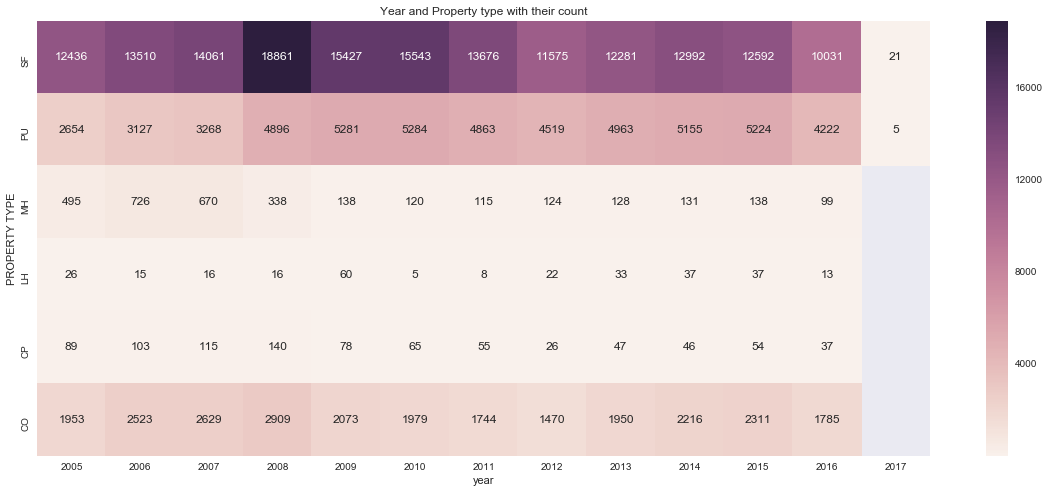

In [19]:
import seaborn as sns
sns.set(style='dark')

plt.figure(figsize=(20, 8))
plt.title('Year and Property type with their count')
ax =sns.heatmap(df_loan1.T,mask= df_loan1.T.isnull(),annot=True,fmt='g');
ax.invert_yaxis()

## Most of the loans sold were of the type Fee Simple in all the years. This is expected as you have absolute ownership of the apartment when you get a fee simple property

In [22]:
df_loan2=df_loan_type.groupby(['CHANNEL','LOAN PURPOSE']).size()
df_loan2=df_loan2.unstack()

In [23]:
df_loan2=df_loan2.reset_index()

df_loan2.name= None

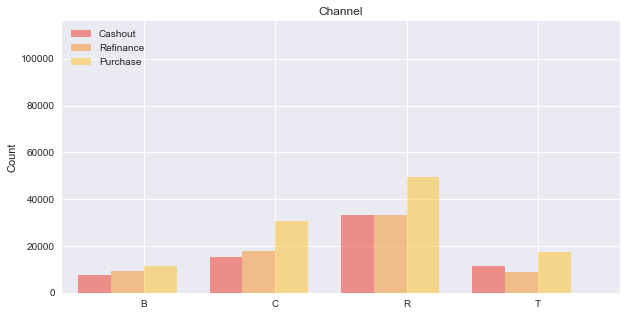

In [72]:
pos = list(range(len(df_loan2['C'])))
width = 0.25


fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos,

        df_loan2['C'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#EE3224',
       label=df_loan2['CHANNEL'][0])


plt.bar([p + width for p in pos],
        df_loan2['N'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F78F1E',
        # with label the second value in first_name
        label=df_loan2['CHANNEL'][1])

plt.bar([p + width*2 for p in pos],

        df_loan2['P'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#FFC222',
        # with label the third value in first_name
        label=df_loan2['CHANNEL'][2])


ax.set_ylabel('Count')

# Set the chart's title
ax.set_title('Channel')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_loan2['CHANNEL'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df_loan2['C'] + df_loan2['N'] + df_loan2['P'])] )

# Adding the legend and showing the plot
plt.legend(['Cashout', 'Refinance', 'Purchase'], loc='upper left')
plt.grid()
plt.show()

## The analysis shows count of cashout, refinance and purchase loans by channel.  Most loans have been given out by retailers, the highest being for PURCHASE. 

In [72]:
path=os.getcwd()+'/Summaries/'

df_per_orig= pd.read_csv(path+'Performance_Origination_summary.csv')

In [73]:
path=os.getcwd()+'/Summaries/'


df_origination=pd.read_csv(path+'Origination.csv')

In [74]:
df_group= df_origination.groupby(['year','LOAN PURPOSE']).size()


df_group=df_group.unstack()


df_group=df_group.reset_index()

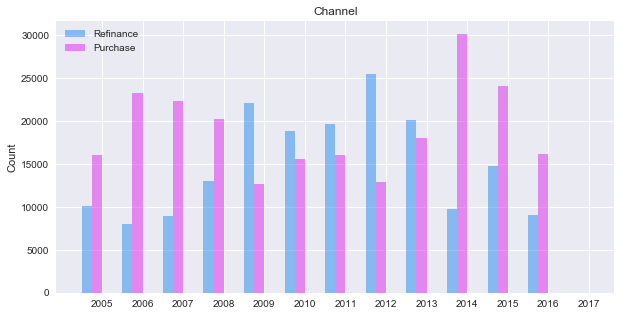

In [76]:
pos = list(range(len(df_group['N'])))
width = 0.25


fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos,
        df_group['N'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#2489ee',
       label=df_group['year'][0])


plt.bar([p + width for p in pos],

        df_group['P'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#e024ee',
        # with label the second value in first_name
        label=df_group['year'][1])



ax.set_ylabel('Count')

# Set the chart's title
ax.set_title('Channel')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_group['year'])

# Setting the x-axis and y-axis limits
# plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, (df_loan2['C'] + df_loan2['N'])] )
# plt.annotate('Refinance at its peak', xy=(2012, 26000),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )
# Adding the legend and showing the plot
plt.legend(['Refinance', 'Purchase'], loc='upper left')
plt.grid()
plt.show()

## We can see that the purchasing count going downwards from 2007 onwards as the recession begins. In 2009, the refinance is way past purchasing. The purchase loan is then increasing as the economy recovers

## LTV was 76.6% in 2014 - a new high since 2000, largely due to the increase of purchase volume over refinances.

In [77]:
df_group1= df_origination.groupby(['year','FIRST TIME HOMEBUYER FLAG']).size()

df_group1=(df_group1.unstack().reset_index())


df_group2=df_origination.groupby(['year','OCCUPANCY STATUS']).size()


df_group2=(df_group2.unstack()).reset_index()


df_group_merged= df_group1.merge(df_group2, on='year', how='left')

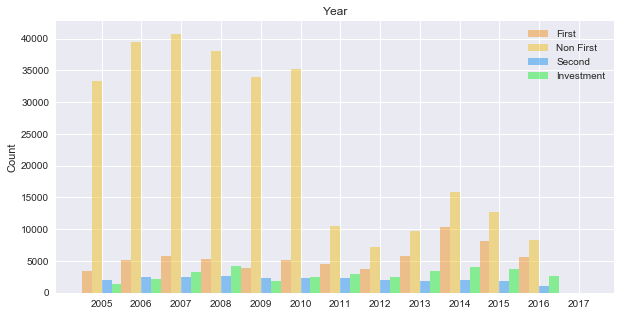

In [78]:
pos = list(range(len(df_group_merged['Y'])))
width = 0.25


fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos,
        df_group_merged['Y'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#ee9624',
       label=df_group_merged['year'][0])


plt.bar([p + width for p in pos],
        df_group_merged['N'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#eec224',
        # with label the second value in first_name
        label=df_group_merged['year'][1])

plt.bar([p + width*2 for p in pos],
        df_group_merged['S'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#2493ee',
        # with label the third value in first_name
        label=df_group_merged['year'][2])

plt.bar([p + width*3 for p in pos],
        df_group_merged['I'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#24ee38',
        # with label the third value in first_name
        label=df_group_merged['year'][3])

ax.set_ylabel('Count')

# Set the chart's title
ax.set_title('Year')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_group_merged['year'])

# Setting the x-axis and y-axis limits
# plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, max(df_loan2['C'] + df_loan2['N'] + df_loan2['P'])] )

# Adding the legend and showing the plot
plt.legend(['First', 'Non First', 'Second','Investment'], loc='upper right')
plt.grid()
plt.show()

## Since, interest rates went down drastically in 2013. You can see the rise in purchase in previous graph. While, in this graph we can clearly see that 2014 was the best year for homebuyers after recession as investors, seond time home buyers and even first time home buyers ratio went up. Investors and non first also reached its peak in 2014.



## The decline in interest rate internet says is because of a combination of economic weakness in Europe, concerns about Ebola and geopolitical turmoil around the world. 

## It was also because of new lending scheme that was introduced during that time

In [79]:
df_2014= df_origination.loc[(df_origination['year']>2006) & (df_origination['year']<2010)]
df_2014_v1=df_2014.groupby('year')['(LTV)'].mean()
df_2014_v2=((df_2014.groupby(['year','Quarter'])['(LTV)'].mean()).unstack()).reset_index()

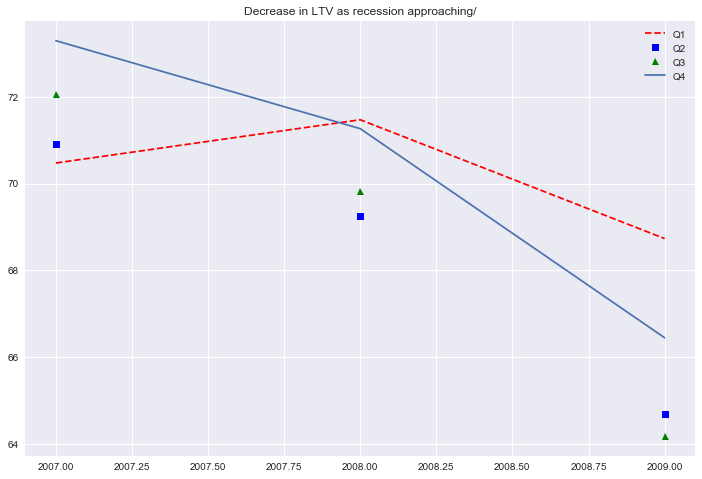

In [80]:
from pylab import *
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(df_2014_v2['year'], df_2014_v2['Q1'],'r--',label='Q1')
plt.plot(df_2014_v2['year'], df_2014_v2['Q2'],'bs',label='Q2')
plt.plot(df_2014_v2['year'], df_2014_v2['Q3'], 'g^',label='Q3')
plt.plot(df_2014_v2['year'], df_2014_v2['Q4'],label='Q4')
# plt.xlabel('Year')
# plt.ylabel('Loan to Value')
plt.title('Decrease in LTV as recession approaching/')
plt.legend(['Q1','Q2','Q3','Q4'], loc='upper right',)
plt.grid(True)
plt.show()

## We can see Loan to value decreaing as the recession approaches with it reaching its bottom value in 2009. 

In [81]:

df_2014= df_origination.loc[(df_origination['year']>2004) & (df_origination['year']<2016)]
df_2014_v1=df_2014.groupby('year')['(LTV)'].mean()
df_2014_v2=((df_2014.groupby(['year','Quarter'])['(LTV)'].mean()).unstack()).reset_index()

(0.625, 12.125)

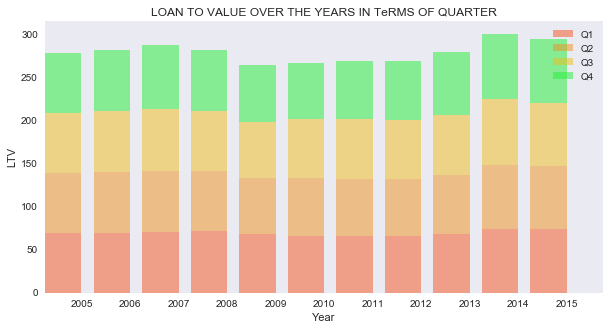

In [83]:
f, ax1 = plt.subplots(1, figsize=(10,5))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(df_2014_v2['Q1']))]

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        df_2014_v2['Q1'],
        width=bar_width,
        label='Q1',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F4561D')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        df_2014_v2['Q2'],
        # set the width
        width=bar_width,
        bottom=df_2014_v2['Q1'],
        label='Q2',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F1911E')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        df_2014_v2['Q3'],
        # set the width
        width=bar_width,
        bottom=[i+j for i,j in zip(df_2014_v2['Q1'],df_2014_v2['Q2'])],
        label='Q3',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F1BD1A')

ax1.bar(bar_l,
        df_2014_v2['Q4'],
        # set the width
        width=bar_width,
        bottom=[i+j+k for i,j,k in zip(df_2014_v2['Q1'],df_2014_v2['Q2'],df_2014_v2['Q3'])],
        label='Q4',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#24ee38')

# set the x ticks with names
plt.xticks(tick_pos, df_2014_v2['year'])
plt.title('LOAN TO VALUE OVER THE YEARS IN TeRMS OF QUARTER')
# Set the label and legends
ax1.set_ylabel("LTV")
ax1.set_xlabel("Year")
plt.legend(loc='upper right')

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])

## We can see LTV going down in the recession period. We can clearly see Quarter 4 is the quarter which is mostly affected over all the year's

In [84]:
df_test= df_origination[['LOAN SEQUENCE NUMBER','Quarter']]

In [85]:
path=os.getcwd()+'/Summaries/'
df_performance= pd.read_csv(path+'Summary1_Performance.csv')

In [86]:
df_test2=df_performance.merge(df_test,on='LOAN SEQUENCE NUMBER',how='left')

df_test3= ((df_test2.groupby(['year','Quarter'])['CURRENT LOAN DELINQUENCY STATUS'].sum()).unstack()).reset_index()

(0.625, 13.125)

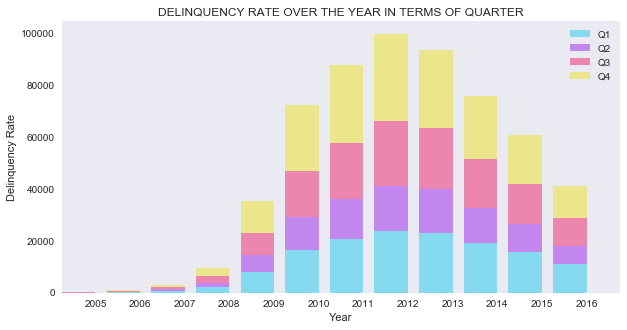

In [88]:
f, ax1 = plt.subplots(1, figsize=(10,5))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(df_test3['Q1']))]

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        df_test3['Q1'],
        # set the width
        width=bar_width,
        label='Q1',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#24ccee')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        df_test3['Q2'],
        # set the width
        width=bar_width,
        bottom=df_test3['Q1'],
        label='Q2',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#9d24ee')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        df_test3['Q3'],
        # set the width
        width=bar_width,
        bottom=[i+j for i,j in zip(df_test3['Q1'],df_test3['Q2'])],
        label='Q3',
        alpha=0.5,
        # with color
        color='#ee246e')

ax1.bar(bar_l,
        df_test3['Q4'],
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j+k for i,j,k in zip(df_test3['Q1'],df_test3['Q2'],df_test3['Q3'])],
        # with the label post score
        label='Q4',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#eee324')

# set the x ticks with names
plt.xticks(tick_pos, df_test3['year'])
plt.title('DELINQUENCY RATE OVER THE YEAR IN TERMS OF QUARTER')
# Set the label and legends
ax1.set_ylabel("Delinquency Rate")
ax1.set_xlabel("Year")
plt.legend(loc='upper right')

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])

## As the recession hit the economy in 2007 we can clearly see increase in DELIQUENCY rates. With less jobs and less LTV the Deliquency rate was bound to increase and it reached its peak in 2012. 

## Quarter 4 again has the highest number of Deliquency increase rates. 

## With economy improving over the year's we can clearly see decline in Deliquency after 2012

In [89]:
df_per_2= pd.read_csv('Summary2_Performance.csv')

df_per_orig2= pd.read_csv('Performance_Origination_Summary2.csv')

df_per_orig2=df_per_orig2[['year_x','ZERO BALANCE CODE','Actual Loss Calculation','Quarter']]

df_per_orig2=((df_per_orig2.groupby(['year_x','ZERO BALANCE CODE','Quarter'])['Actual Loss Calculation'].sum()).reset_index())

df_per_orig2_3=df_per_orig2[df_per_orig2['ZERO BALANCE CODE']==3.0]

df_per_orig2_3=(df_per_orig2_3.groupby(['year_x','Quarter'])['Actual Loss Calculation'].sum()).reset_index()

df_per_orig2_9=df_per_orig2[df_per_orig2['ZERO BALANCE CODE']==9.0]
df_per_orig2_9=((df_per_orig2_9.groupby(['year_x','Quarter'])['Actual Loss Calculation'].sum()).reset_index())

In [90]:
df_per_orig2_3['Actual Loss Calculation']=pd.DataFrame(df_per_orig2_3['Actual Loss Calculation'].abs())

df_per_orig2_9['Actual Loss Calculation']=pd.DataFrame(df_per_orig2_9['Actual Loss Calculation'].abs())

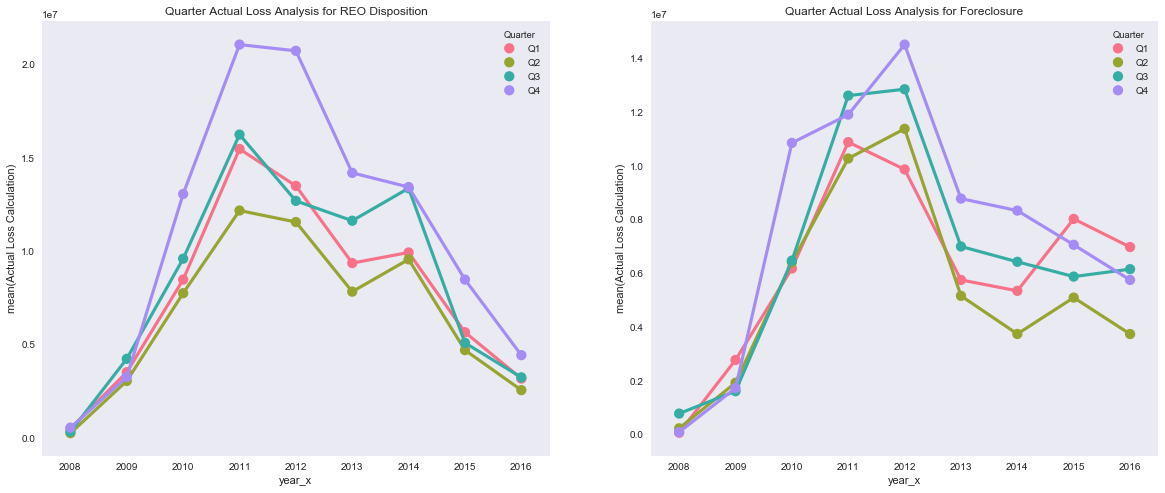

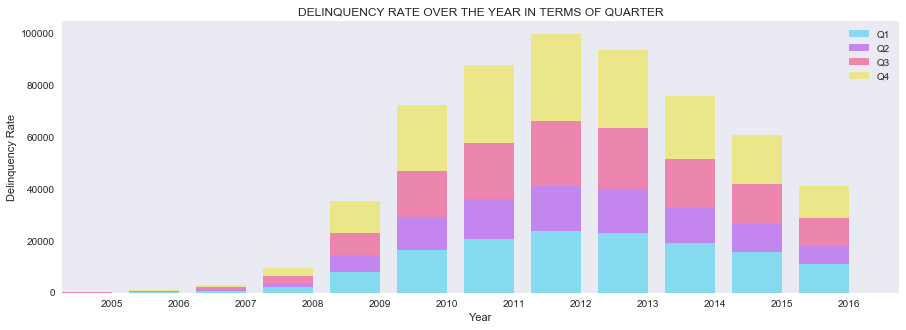

In [93]:
plt.figure()

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Quarter Actual Loss Analysis for REO Disposition")
plt.xlabel='Year'
plt.ylabel=('Actual Loss')
sns.pointplot(x=df_per_orig2_9['year_x'], y=df_per_orig2_9['Actual Loss Calculation'], hue=df_per_orig2_9['Quarter'], palette="husl",data=df_per_orig2_9);


plt.subplot(1,2,2)
plt.title("Quarter Actual Loss Analysis for Foreclosure")
sns.pointplot(x=df_per_orig2_3['year_x'], y=df_per_orig2_3['Actual Loss Calculation'], hue=df_per_orig2_3['Quarter'],palette="husl", data=df_per_orig2_3);


f, ax1 = plt.subplots(1, figsize=(15,5))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(df_test3['Q1']))]

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        df_test3['Q1'],
        # set the width
        width=bar_width,
        label='Q1',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#24ccee')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        df_test3['Q2'],
        # set the width
        width=bar_width,
        bottom=df_test3['Q1'],
        label='Q2',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#9d24ee')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        df_test3['Q3'],
        # set the width
        width=bar_width,
        bottom=[i+j for i,j in zip(df_test3['Q1'],df_test3['Q2'])],
        label='Q3',
        alpha=0.5,
        # with color
        color='#ee246e')

ax1.bar(bar_l,
        df_test3['Q4'],
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j+k for i,j,k in zip(df_test3['Q1'],df_test3['Q2'],df_test3['Q3'])],
        # with the label post score
        label='Q4',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#eee324')

# set the x ticks with names
plt.xticks(tick_pos, df_test3['year'])
plt.title('DELINQUENCY RATE OVER THE YEAR IN TERMS OF QUARTER')
# Set the label and legends
ax1.set_ylabel("Delinquency Rate")
ax1.set_xlabel("Year")
plt.legend(loc='upper right')

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.show()

## We can clearly see that REO is much more as compared to RECLOSURE. When we look at Deliquency and LOSS PLots we can clearly see the relation. With the increase in deliquency the Loss has also increased. Quarter 4 again has significantly higher rate in all the 3 plots.